<a href="https://colab.research.google.com/github/kimmiso726/DataScience/blob/main/%EA%B0%9C%EC%9D%B8_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EA%B5%AD%EA%B0%80%EB%B3%84_%ED%96%89%EB%B3%B5%EC%A7%80%EC%88%98_%EC%98%88%EC%B8%A1(%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터를 읽기 위한 라이브러리
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
# 데이터 전처리를 위한 라이브러리
import tensorflow as tf
tf.random.set_seed(777)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mse
# 머신러닝 ML model 라이브러리
from sklearn.linear_model import Ridge
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error

*한글 깨짐 방지*

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


데이터 준비하기

In [ ]:
# 1. 훈련용 데이터셋
data=pd.read_csv('/content/world-happiness-report.csv')
# 2. 테스트용 데이터셋
test_data=pd.read_csv('/content/world-happiness-report-2021.csv')

In [ ]:
data.head() #행복지수, GDP, 사회적 지원, 기대 수명, 자유, 관대함, 부패에 대한 인식

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       1949 non-null   float64
 1   Log GDP per capita                1913 non-null   float64
 2   Social support                    1936 non-null   float64
 3   Healthy life expectancy at birth  1894 non-null   float64
 4   Freedom to make life choices      1917 non-null   float64
 5   Generosity                        1860 non-null   float64
 6   Perceptions of corruption         1839 non-null   float64
dtypes: float64(7)
memory usage: 106.7 KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      149 non-null    object 
 1   Life Ladder                       149 non-null    float64
 2   Log GDP per capita                149 non-null    float64
 3   Social support                    149 non-null    float64
 4   Healthy life expectancy at birth  149 non-null    float64
 5   Freedom to make life choices      149 non-null    float64
 6   Generosity                        149 non-null    float64
 7   Perceptions of corruption         149 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.4+ KB


In [ ]:
print(data.shape)
print(test_data.shape)

(1949, 7)
(149, 8)


# **데이터 전처리 하기**

In [ ]:
#null(결손) 값인 경우 삭제
data = data[data['Log GDP per capita'].notnull()]
data = data[data['Social support'].notnull()]
data = data[data['Healthy life expectancy at birth'].notnull()]
data = data[data['Freedom to make life choices'].notnull()]
data = data[data['Generosity'].notnull()]
data = data[data['Perceptions of corruption'].notnull()]


data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1712 entries, 0 to 1948
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       1712 non-null   float64
 1   Log GDP per capita                1712 non-null   float64
 2   Social support                    1712 non-null   float64
 3   Healthy life expectancy at birth  1712 non-null   float64
 4   Freedom to make life choices      1712 non-null   float64
 5   Generosity                        1712 non-null   float64
 6   Perceptions of corruption         1712 non-null   float64
dtypes: float64(7)
memory usage: 107.0 KB


In [ ]:
#null(결손) 값인 경우 삭제
test_data = test_data[test_data['Log GDP per capita'].notnull()]
test_data = test_data[test_data['Social support'].notnull()]
test_data = test_data[test_data['Healthy life expectancy at birth'].notnull()]
test_data = test_data[test_data['Freedom to make life choices'].notnull()]
test_data = test_data[test_data['Generosity'].notnull()]
test_data = test_data[test_data['Perceptions of corruption'].notnull()]


test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      149 non-null    object 
 1   Life Ladder                       149 non-null    float64
 2   Log GDP per capita                149 non-null    float64
 3   Social support                    149 non-null    float64
 4   Healthy life expectancy at birth  149 non-null    float64
 5   Freedom to make life choices      149 non-null    float64
 6   Generosity                        149 non-null    float64
 7   Perceptions of corruption         149 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.5+ KB


In [ ]:
print(data.shape)
print(test_data.shape)

(1712, 7)
(149, 8)


**데이터 분리하기 X:문제집, y:정답**

In [ ]:
# 훈련용
X_train = data.drop('Life Ladder', axis=1)
y_train = data['Life Ladder'].copy()
X_train

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.370,0.451,50.80,0.718,0.168,0.882
1,7.540,0.552,51.20,0.679,0.190,0.850
2,7.647,0.539,51.60,0.600,0.121,0.707
3,7.620,0.521,51.92,0.496,0.162,0.731
4,7.705,0.521,52.24,0.531,0.236,0.776
...,...,...,...,...,...,...
1944,7.984,0.768,54.40,0.733,-0.095,0.724
1945,8.016,0.754,55.00,0.753,-0.098,0.751
1946,8.049,0.775,55.60,0.763,-0.068,0.844
1947,7.950,0.759,56.20,0.632,-0.064,0.831


In [ ]:
# 테스트용
X_test = test_data.drop(['Life Ladder', 'Country name'], axis = 1)
y_test = test_data['Life Ladder'].copy()
country = test_data["Country name"]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


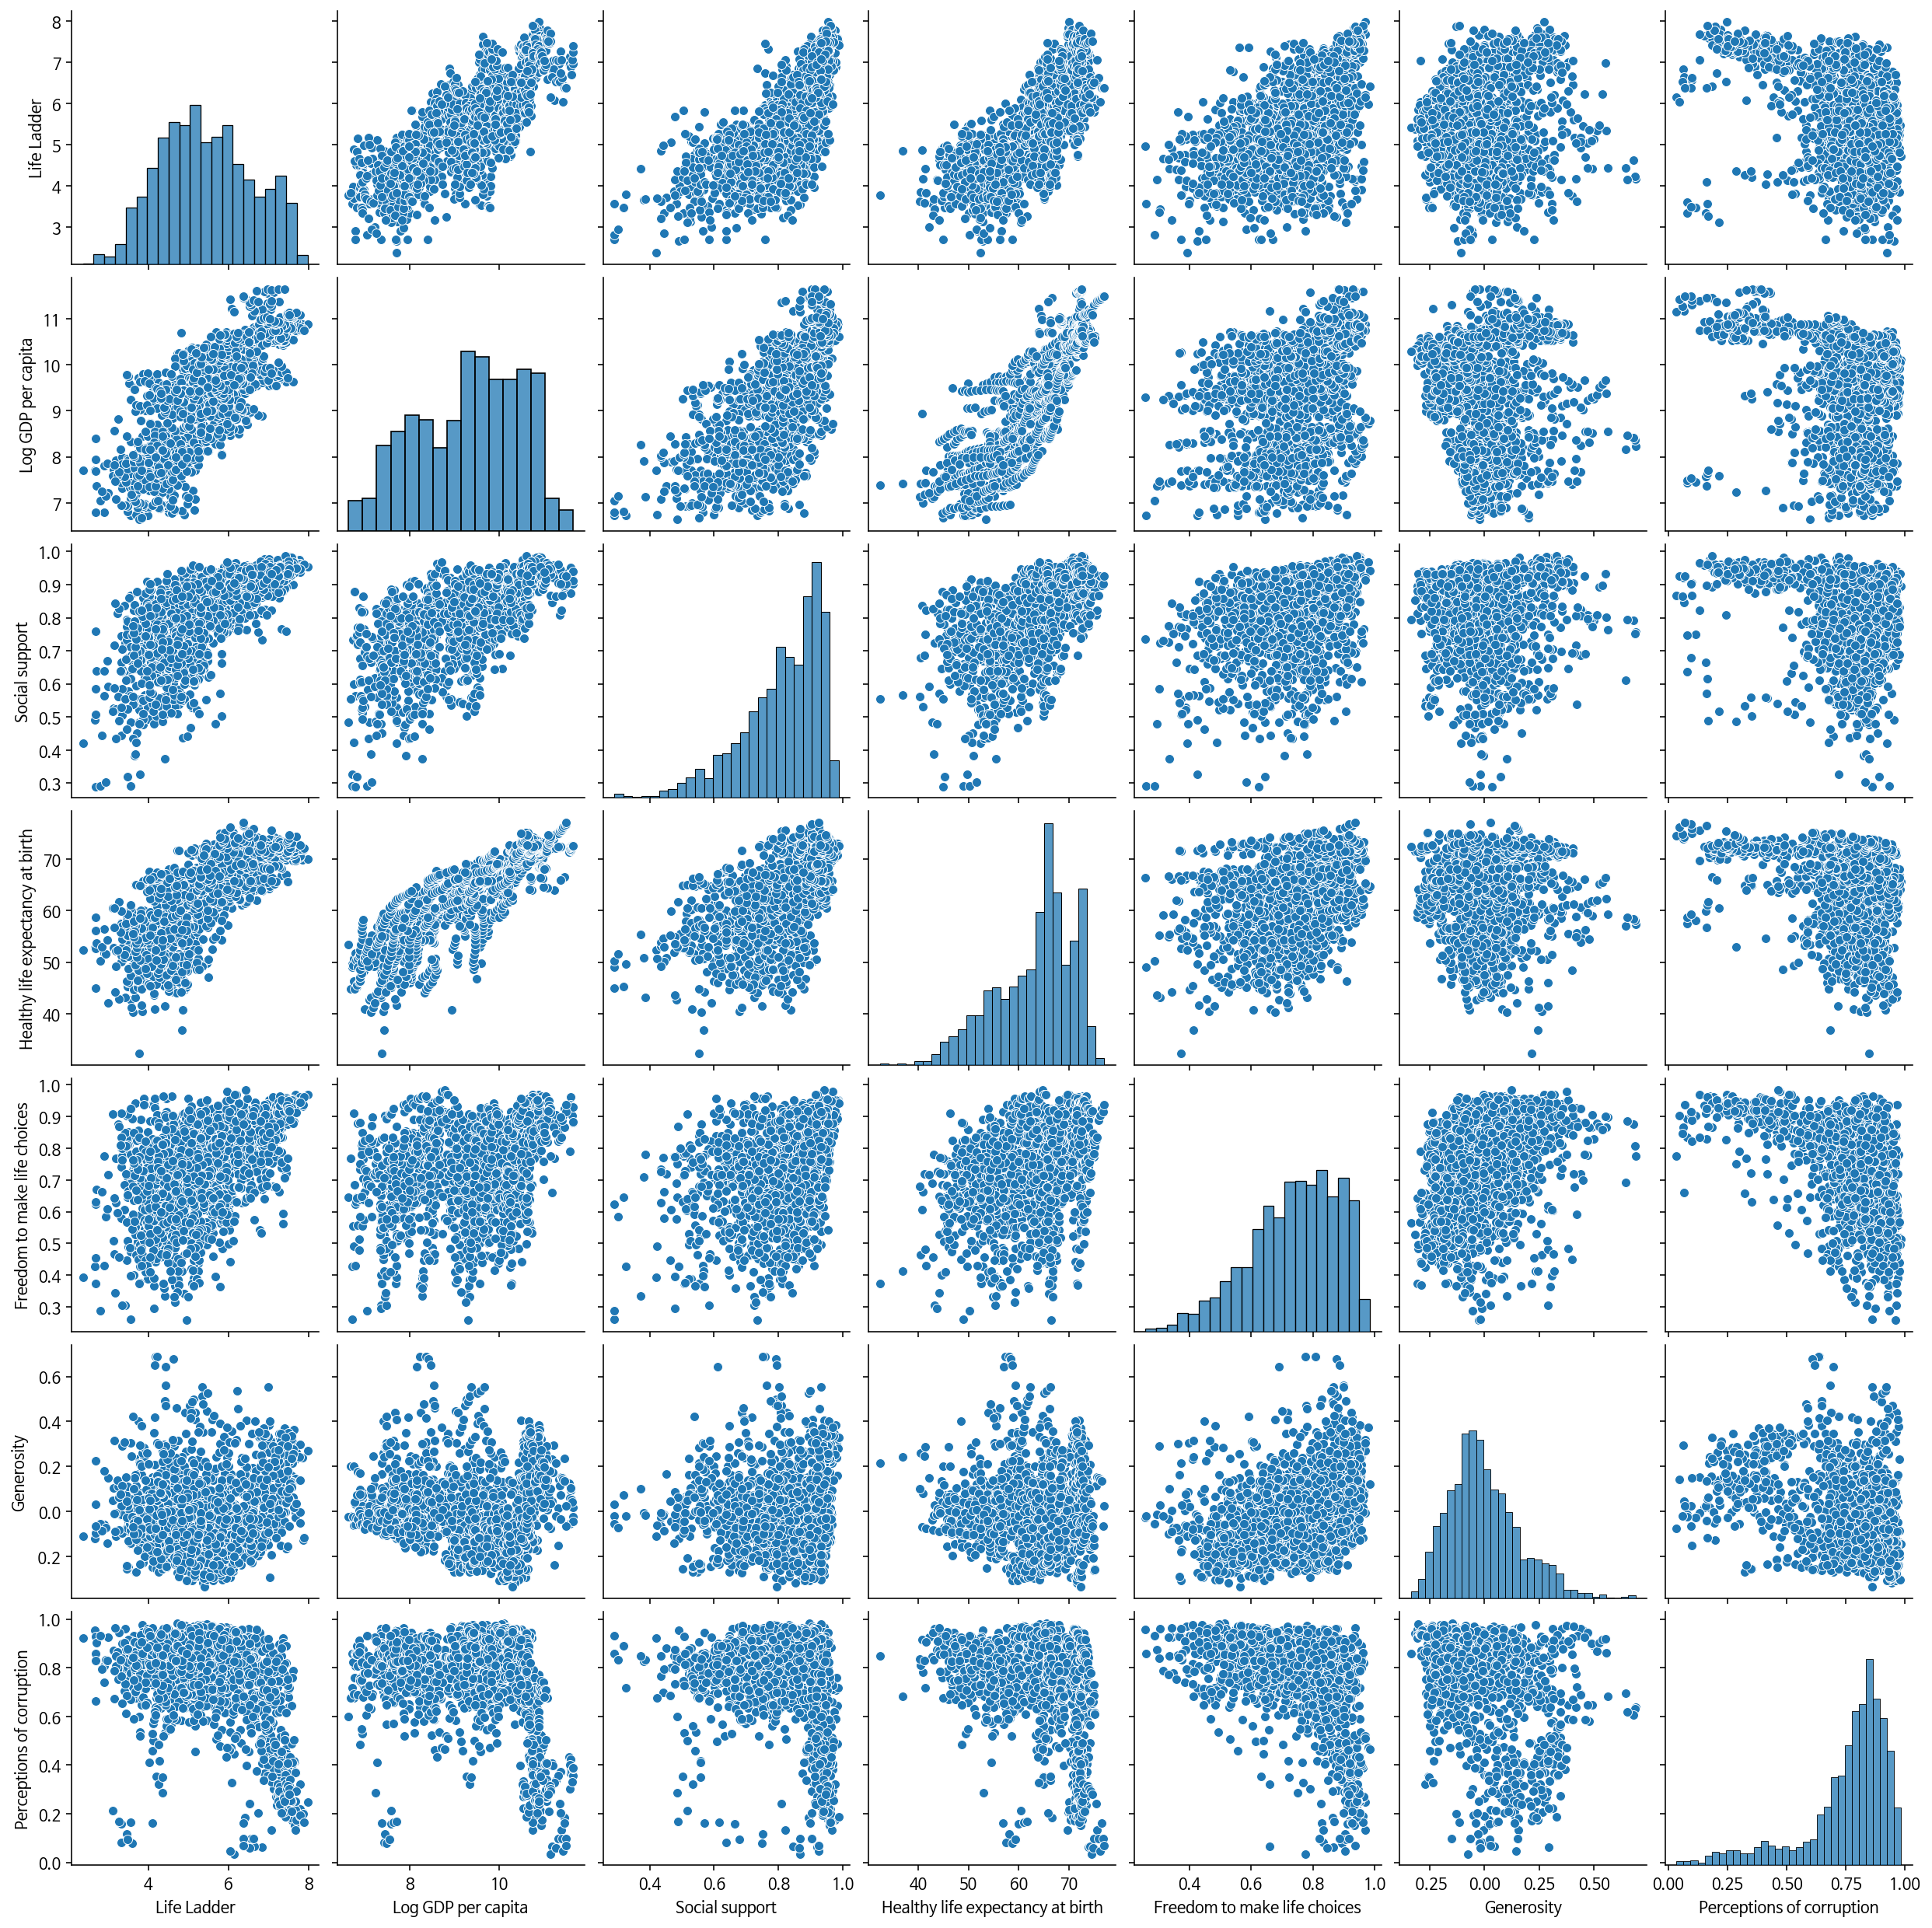

In [ ]:
#seaborn pairplot으로 두 변수간의 모든 경우의 수 그리기
sns.pairplot(data)

**1. Ridge 회귀분석 모형을 사용하여 예측하기**

In [ ]:
#Ridge회귀분석 모형 객체 생성 후 학습 시기키
ridge=Ridge(alpha=0.1).fit(X_train,y_train)

성능 평가하기

In [ ]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산-> 결정계수 값이 클수록 모형의 예측 능력이 좋다고 판단
r_square=ridge.score(X_test,y_test)
r_square

0.7419873009065766

In [ ]:
# 모형에 테스트 세트 X_test 데이터를 입력하여 예측한 값 y_hat으로 담기
y_hat=ridge.predict(X_test)

In [ ]:
print('훈련 세트 정확도 : {:.2f}%'.format(ridge.score(X_train,y_train)*100))
print('테스트 세트 정확도 : {:.2f}%'.format(ridge.score(X_test,y_test)*100))

훈련 세트 정확도 : 75.26%
테스트 세트 정확도 : 74.20%


*** Ridge 모델 행복지수 예측 그래프***

Text(0.5, 1.0, 'Ridge 모델 행복지수 예측')

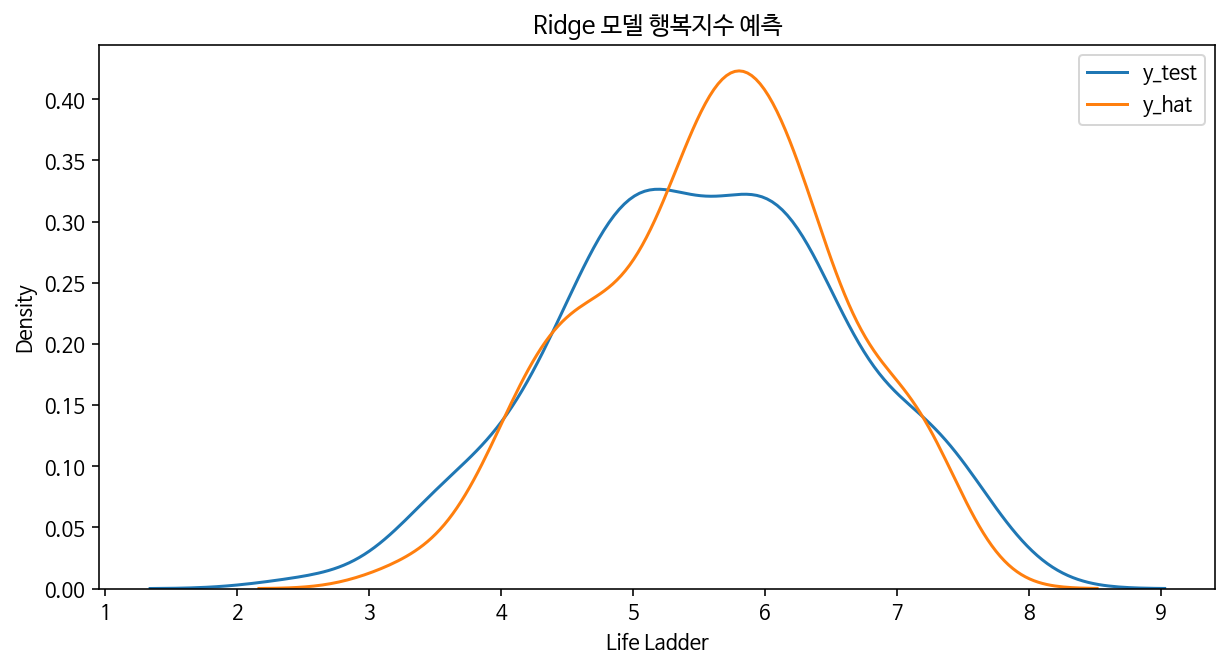

In [ ]:
plt.figure(figsize=(10,5))
ax1=sns.kdeplot(y_test, label='y_test')
ax2=sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.title('Ridge 모델 행복지수 예측')

**2. RandomforestRegressor를 이용하여 예측하기**

In [ ]:
random = RandomForestRegressor(n_estimators=300,
                                   random_state=0).fit(X_train, y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ', random.score(X_train, y_train))
print('Test data Score: ', random.score(X_test, y_test))

Train data Score:  0.9810210764162911
Test data Score:  0.8964078516889915


In [ ]:
pred = random.predict(X_test)
res = pd.DataFrame(pred)
res["country"] = country 
res

,0,country
0,7.750370,Finland
1,7.641557,Denmark
2,7.508170,Switzerland
3,7.489920,Iceland
4,7.448580,Netherlands
...,...,...
144,3.874370,Lesotho
145,3.790763,Botswana
146,3.685527,Rwanda
147,3.842420,Zimbabwe


In [ ]:
mean_squared_error(y_test, pred, sample_weight=None, multioutput='uniform_average', squared=True)

0.11867221038881393

# **3. Keras를 사용하여 예측하기**

***데이터 전처리 및 검증 데이터셋 만들기***

In [ ]:
#데이터프레임을 넘파이로 변경하기 위해서
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

# 데이터 전처리 -> 표준화 (Standardization)
mean = np.mean(X_train_array, axis=0)
std = np.std(X_train_array, axis=0)

# 데이터(훈련, 테스트 데이터 모두)- 평균 / 표준편차 (Standardization)
X_train_array = (X_train_array - mean) / std
X_test_array = (X_test_array - mean) /std

In [ ]:
print(X_train_array.shape, y_train_array.shape) # 훈련용 문제집과 훈련용 답지
print(X_test_array.shape, y_test_array.shape)  # 테스트용 문제집과 타겟

(1712, 6) (1712,)
(149, 6) (149,)


In [ ]:
print(X_train_array[0])

[-1.68426769 -2.95218591 -1.61728111 -0.15054049  1.0414503   0.70444167]


In [ ]:
# 검증 데이터셋을 만듭니다.

from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 7:3 비율로 분리
X_train_array, X_val, y_train_array, y_val = train_test_split(X_train_array, y_train_array,
                                                  test_size=0.33,
                                                  random_state=777)

In [ ]:
print(X_train.shape, X_val.shape)

(1712, 6) (565, 6)


***모델 구성하기***

In [ ]:
model=Sequential()
model.add(Dense(200, input_shape=(6,),activation='relu')) # 다층 퍼셉트론을 구성
model.add(Dense(100, activation='relu')) # 다층 퍼셉트론을 구성
model.add(Dense(1))
#활성화 함수는 기본적으로 linear이기 때문에 안씀

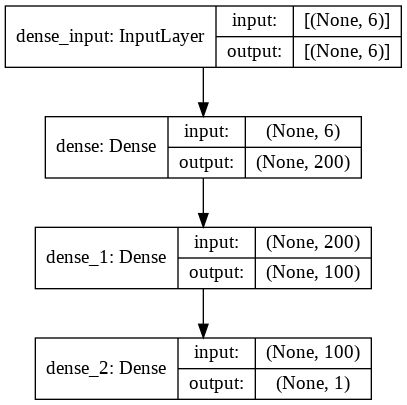

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)

***모델 설정하기***

In [ ]:
#model.compile(optimizer= RMS(), loss=mse, metrics=['acc'])
model.compile(optimizer= Adam(lr=0.001), loss=mse, metrics=['mae', 'mse'])
#model.compile(optimizer='adam', loss= 'mse', metrics=['mae', 'mse']) 


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


***모델 학습하기***

In [ ]:
history = model.fit(X_train_array, y_train_array,
                    epochs=100,batch_size=64,
                    validation_data = (X_val, y_val)) # 학습데이터, 정답, 공부 , 검증 데이터

Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 15.8119 - mae: 3.6757 - mse: 15.8119 - val_loss: 6.3438 - val_mae: 2.1811 - val_mse: 6.3438
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 3.8979 - mae: 1.6008 - mse: 3.8979 - val_loss: 2.3485 - val_mae: 1.2568 - val_mse: 2.3485
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 2.0329 - mae: 1.1229 - mse: 2.0329 - val_loss: 1.7741 - val_mae: 1.0642 - val_mse: 1.7741
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 1.5980 - mae: 0.9781 - mse: 1.5980 - val_loss: 1.4527 - val_mae: 0.9482 - val_mse: 1.4527
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 1.4027 - mae: 0.9061 - mse: 1.4027 - val_loss: 1.3124 - val_mae: 0.8972 - val_mse: 1.3124
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 1.2507 - mae: 0.8592 - mse: 1.2507 - val_loss: 1.1501 - val_mae: 0.8370 - val_mse: 1.1501
Epoch 7/100
18/18 [

In [ ]:
# 내가 예측한 결과물
test_predictions=model.predict(X_test_array)

**모델 결과 그리기**

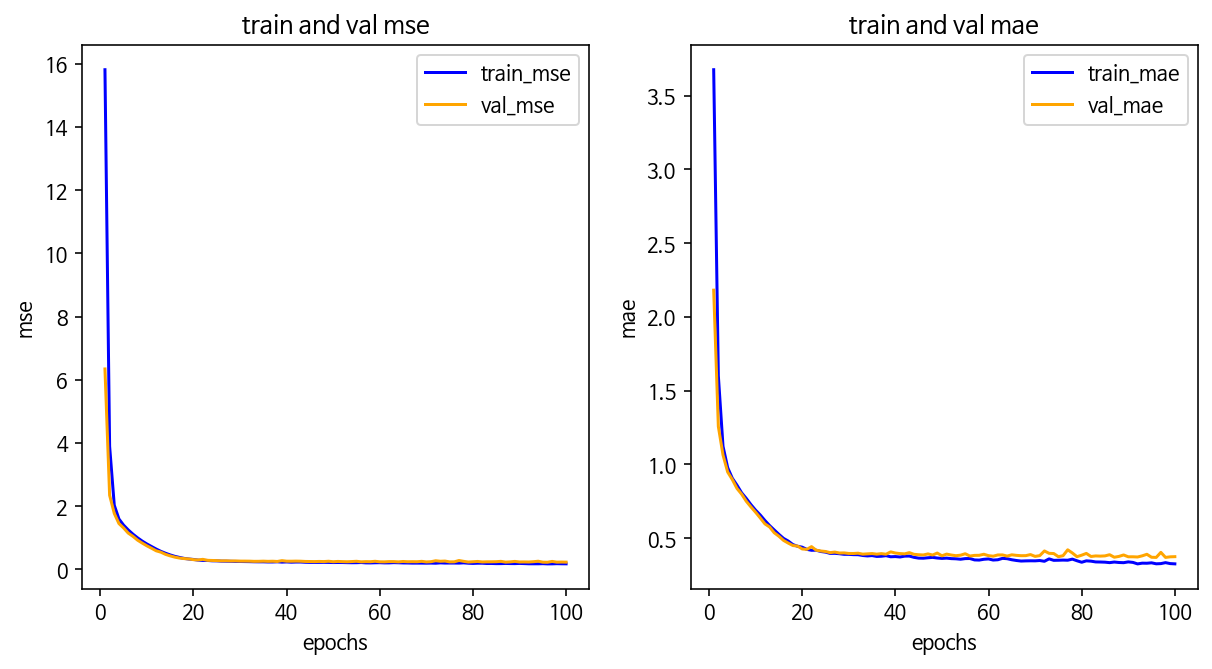

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

**모델 평가하기**

In [ ]:
model.evaluate(X_test_array, y_test_array) #mae 0.3 -> 실제 행복지수와 0.3 정도 차이

5/5 [==============================] - 0s 2ms/step - loss: 0.2123 - mae: 0.3528 - mse: 0.2123


[0.21230189502239227, 0.35283905267715454, 0.21230189502239227]

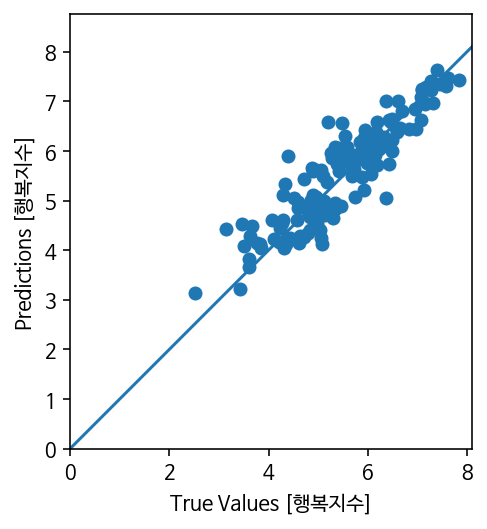

In [ ]:
test_predictions = model.predict(X_test_array).flatten()

plt.scatter(y_test_array, test_predictions)
plt.xlabel('True Values [행복지수]')
plt.ylabel('Predictions [행복지수]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


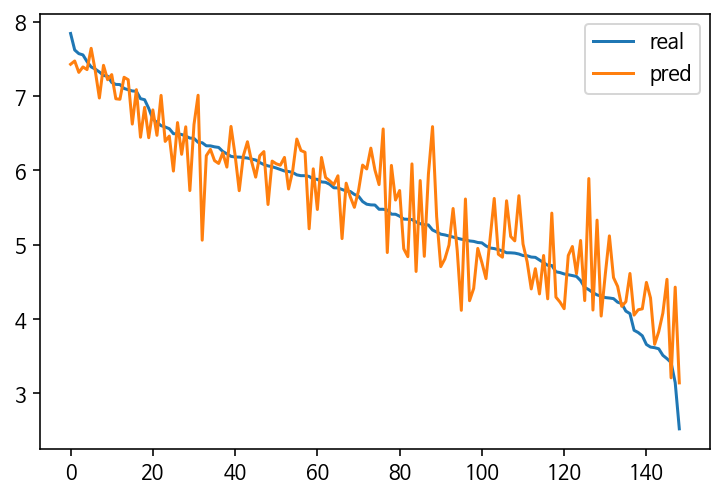

In [ ]:
plt.plot(y_test, label="real")
plt.plot(test_predictions, label="pred")
plt.legend()
plt.show()

In [ ]:
y_test.head() #실제

0    7.842
1    7.620
2    7.571
3    7.554
4    7.464
Name: Life Ladder, dtype: float64

In [ ]:
y_test.tail()

144    3.512
145    3.467
146    3.415
147    3.145
148    2.523
Name: Life Ladder, dtype: float64

In [ ]:
test_data[test_data["Country name"] == "South Korea"]

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
61,South Korea,5.845,10.651,0.799,73.9,0.672,-0.083,0.727


In [ ]:
test_predictions[61] # 내가 예측한 한국

6.1741014

In [ ]:
test_data.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [ ]:
test_data.tail()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
144,Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


In [ ]:
test_predictions[:5] #내가 예측한 순위5

array([7.427764 , 7.471836 , 7.3186297, 7.391863 , 7.356152 ],
      dtype=float32)

In [ ]:
test_predictions[-5:] # 뒤에서부터 예측 5

array([4.0807405, 4.5345955, 3.2090452, 4.429305 , 3.1412637],
      dtype=float32)

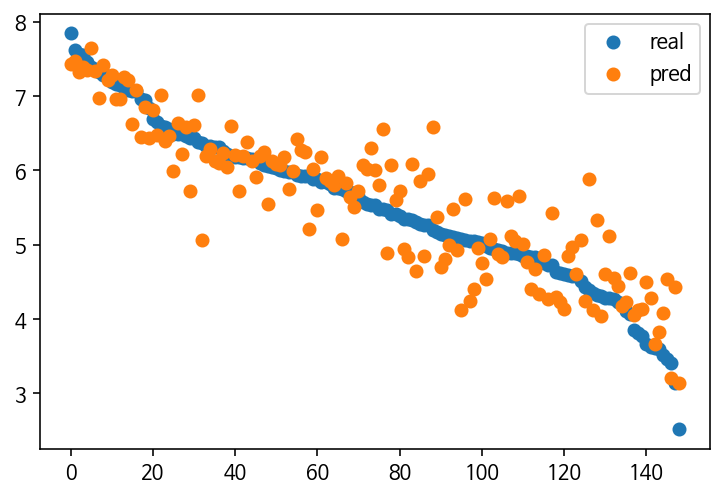

In [ ]:
plt.scatter(range(len(y_test)), y_test, label="real")
plt.scatter(range(len(y_test)), test_predictions, label="pred")
plt.legend()
plt.show()

In [ ]:
test_predictions[88] # 80-100사이 튀는 값: 몰디브

6.588857